# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [3]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine

In [4]:
# load messages dataset
messages = pd.read_csv('messages.csv') 
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [5]:
# load categories dataset
categories = pd.read_csv('categories.csv')
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [6]:
# merge datasets
df = messages.merge(categories, how='left', on=('id'))
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [7]:
# create a dataframe of the 36 individual category columns
categories = df['categories'].str.split(";", expand=True)
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [8]:
# select the first row of the categories dataframe
row = categories.loc[0]

# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = list(row.str.split("-", expand = True)[0])
print(category_colnames)

['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']


In [9]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [10]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].str.split("-").str[1]
    
    # convert column from string to numeric
    categories[column] = pd.to_numeric(categories[column])
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [11]:
# drop the original categories column from `df`

df = df.drop(columns=['categories'])
df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [12]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df, categories], axis=1)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Defective rows
df.loc[df['related']==2, 'related'] = 1

### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [16]:
# check number of duplicates
df[df.duplicated() == True].shape[0]

171

In [17]:
# drop duplicates
df = df.drop_duplicates()

In [44]:
# check number of duplicates
df[df.duplicated() == True].shape[0]

0

In [31]:
describe_df = df.describe().drop(columns=['id'])

In [32]:
describe_df

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
count,26215.000000,26215.000000,26215.000000,26215.000000,26215.000000,26215.000000,26215.000000,26215.000000,26215.000000,26215.0,...,26215.000000,26215.000000,26215.000000,26215.000000,26215.000000,26215.000000,26215.000000,26215.000000,26215.000000,26215.000000
mean,0.766470,0.170666,0.004501,0.414267,0.079496,0.050086,0.027618,0.017967,0.032806,0.0,...,0.011787,0.043906,0.278352,0.082205,0.093191,0.010757,0.093649,0.020217,0.052489,0.193591
std,0.423085,0.376224,0.066941,0.492604,0.270517,0.218126,0.163878,0.132833,0.178131,0.0,...,0.107929,0.204890,0.448196,0.274682,0.290705,0.103160,0.291345,0.140746,0.223015,0.395120
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter

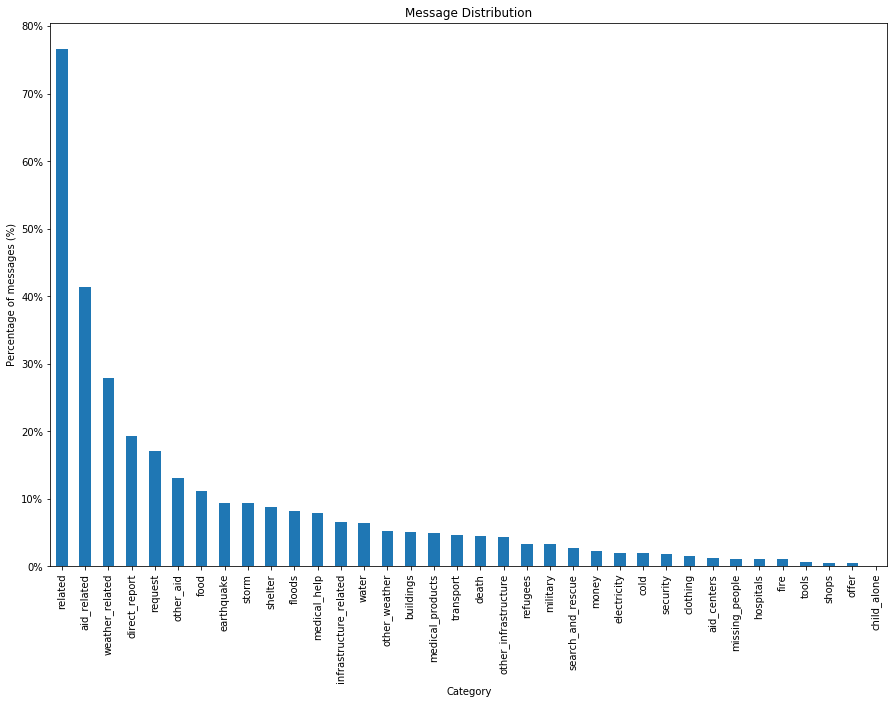

In [43]:

fig = plt.figure(figsize = (15,10))
(describe_df.loc['mean', :].sort_values(ascending=False)).plot(kind='bar');
plt.gca().yaxis.set_major_formatter(PercentFormatter(1));
plt.ylabel('Percentage of messages (%)');
plt.xlabel('Category');
plt.title('Message Distribution');

In [20]:
df[(df['message'].str.contains('water')) & (df['water']==0)]

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
24,36,"I want to say hello, my message is to let you ...",Mwen salye nou dab mesaj mwen an se jis nou ge...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,48,How we can find food and water? we have people...,Comment nou ka jwen dlo ak manje nou gen moun ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,315,sos water and food. need to find where this ad...,"S. O. S EAU ET NOURRITURE. IMPASSE RIGAL, RUE ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,548,"I am in Carrefour, I can't find food nor water...","Mwen kafou mwen pa jwenn manje, mwen pa jwenn ...",direct,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
458,561,"We need water and food, please help us because...",ON A BESOIN DEAU ET DE NOURRITURES SVP AIDEZ N...,direct,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26288,30155,Parallel to the UNHCR organised repatriation c...,NaN,news,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26297,30165,Officials have opened a barrage on the river n...,NaN,news,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
26314,30184,"They will include basic cooking supplies, plat...",NaN,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26335,30209,One of the first organizations to respond to t...,NaN,news,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


In [30]:
df = df.drop(columns=['child_alone'])

In [34]:
describe_df.loc['mean']

id                        15217.885886
related                       0.767301
request                       0.171038
offer                         0.004586
aid_related                   0.415144
medical_help                  0.079550
medical_products              0.049989
search_and_rescue             0.027477
security                      0.017850
military                      0.032707
child_alone                   0.000000
water                         0.063822
food                          0.112029
shelter                       0.088759
clothing                      0.015539
money                         0.022967
missing_people                0.011408
refugees                      0.033351
death                         0.045630
other_aid                     0.131282
infrastructure_related        0.064769
transport                     0.045933
buildings                     0.050974
electricity                   0.020390
tools                         0.006026
hospitals                

In [15]:
df[(df['message'].str.contains('food')==True) & (df['food']==0)]['message']

24       I want to say hello, my message is to let you ...
35       How we can find food and water? we have people...
79           I would like to know how food is distributed.
98       We are in Plaine du Cul-de-sac. Where's the ne...
141      Please, call or write us if you need more info...
                               ...                        
26137    In the aftermath of the disaster, the siblings...
26172    Households will see a drastic reduction in the...
26319    UNHCR ($653,000) is supplying basic non-food i...
26336    Meanwhile, Agritrade [ http://agritrade.cta.in...
26348    Families who fled to makeshift camps were forc...
Name: message, Length: 570, dtype: object

In [25]:
# correcting weird classifications
df.loc[df['message'].str.contains('water')==True, 'water'] = 1

In [45]:
df.loc[df['message'].str.contains('medic')==True, 'medical_help'] 

### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [31]:
engine = create_engine('sqlite:///DisasterResponse.db')
df.to_sql('Messages', engine, index=False, if_exists = 'replace')

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.